#          EDA

In [1]:
import pandas as pd
import numpy as np
import os
import math
import glob
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
sbn.set_style("whitegrid")
%matplotlib inline

In [2]:
td=pd.read_csv(r"E:\ds course\data sets\data sets from kaggle\titanic.csv")

In [3]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
td.shape

(891, 12)

In [5]:
#  to get information about the data set


td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\harid\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


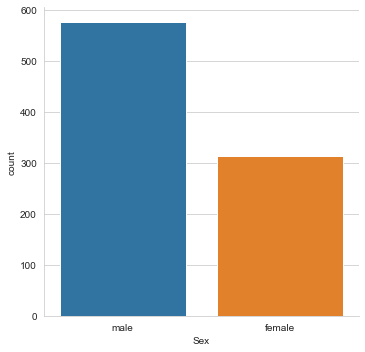

In [7]:
# gender plot

sbn.factorplot("Sex",data=td,kind="count")

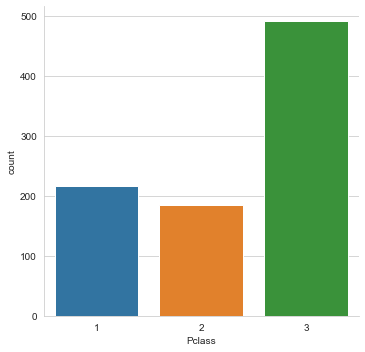

In [16]:
# gender plot

sbn.factorplot("Pclass",data=td,kind="count")

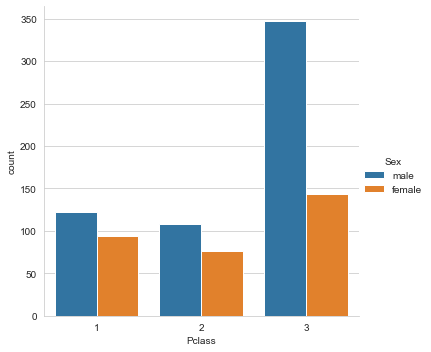

In [17]:
# gender plot

sbn.factorplot("Pclass",data=td,hue="Sex",kind="count")

In [8]:
# data manipulation







def titanic_children(Passenger):
    age,sex=Passenger
    if age <=16:
        return "child"
    else:
        return sex
    
    
    
td["Person"]=td[["Age","Sex"]].apply(titanic_children,axis=1)

In [9]:
td["Person"].value_counts()

male      526
female    265
child     100
Name: Person, dtype: int64

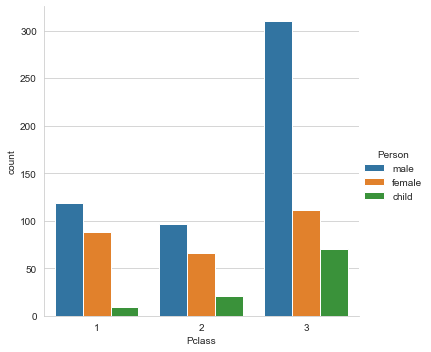

In [21]:
# plotting a graph to check the ratio of male,female,child to each category of class



sbn.factorplot("Pclass",data=td,hue="Person",kind="count")

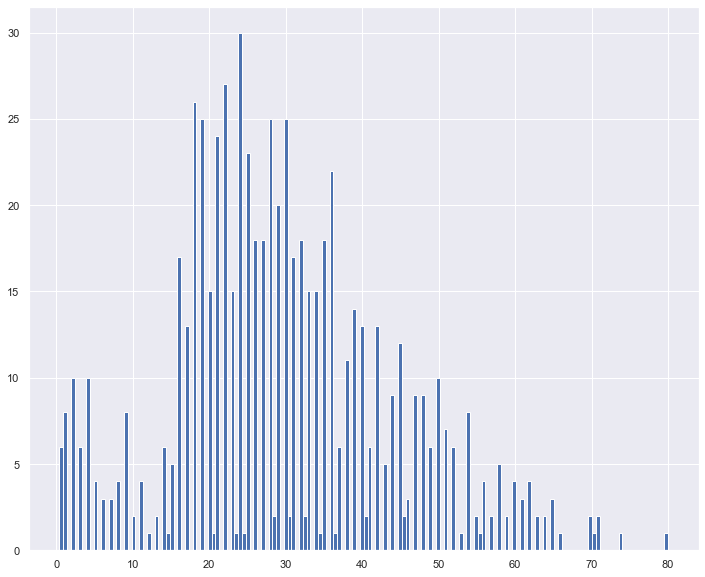

In [23]:
sbn.set(rc={"figure.figsize":(12,10)})
td["Age"].hist(bins=160)

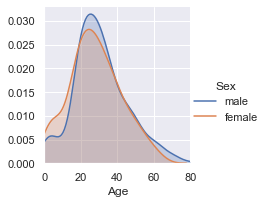

In [25]:
as_fig=sbn.FacetGrid(td,hue="Sex")
as_fig.map(sbn.kdeplot,"Age",shade=True)
oldest=td["Age"].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

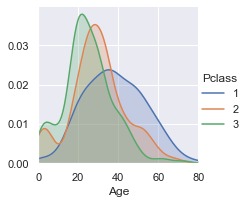

In [26]:
as_fig=sbn.FacetGrid(td,hue="Pclass")
as_fig.map(sbn.kdeplot,"Age",shade=True)
oldest=td["Age"].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

In [27]:
### mean age of the passengers
td["Age"].mean()

29.69911764705882

In [28]:
td["Age"]=td["Age"].fillna(td["Age"].mean())

In [29]:
td["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [30]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Person       891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [31]:
# drop the cabin col as there are many null values and it doesnot help the prediction




td.drop("Cabin",axis=1,inplace=True)

In [33]:
td.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Person'],
      dtype='object')

In [34]:
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Person       891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
### fill the null values in embarked col with S as there are more no of passengers boarder



td["Embarked"]=td["Embarked"].fillna("S")

In [37]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Person       891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
td.isnull().values.any()

False

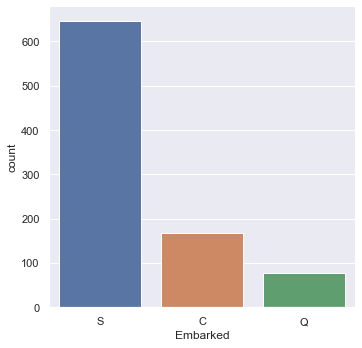

In [40]:
sbn.factorplot("Embarked",data=td,kind="count")

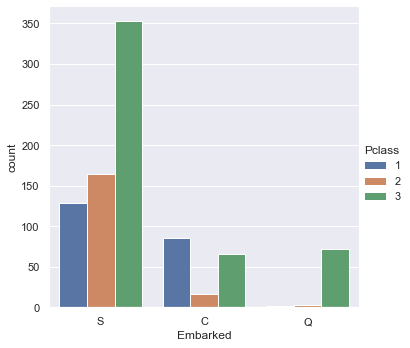

In [41]:
sbn.factorplot("Embarked",data=td,hue="Pclass",kind="count")

# it is intereting to see that most of the passengers boarded at queenstown are from 3rd class

In [44]:
### lets check who are with family ahd who are alone 

## this can be found by adding parch and sibsp columns



td["Alone"]=td.Parch + td.SibSp


In [45]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Person       891 non-null    object 
 12  Alone        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


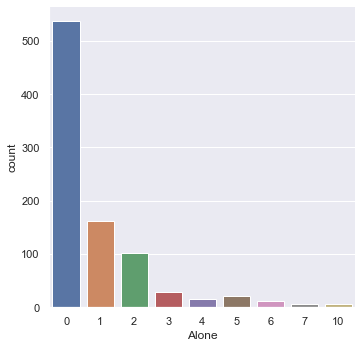

In [46]:
sbn.factorplot("Alone",kind="count",data=td)

In [47]:
## if alone value is > 0 then they are with family else they are alone


td["Alone"].loc[td["Alone"]> 0]= " with famiy"
td["Alone"].loc[td["Alone"]== 0]= " without famiy"

C:\Users\harid\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


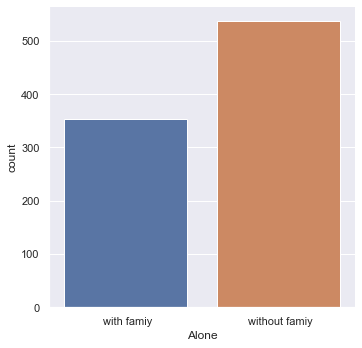

In [48]:
### let us visualize the alone column

sbn.factorplot("Alone",kind="count",data=td)

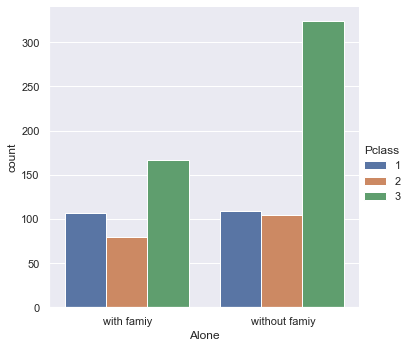

In [49]:
sbn.factorplot("Alone",kind="count",hue="Pclass",data=td)

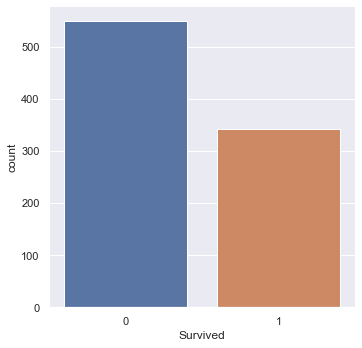

In [50]:
sbn.factorplot("Survived",kind="count",data=td)

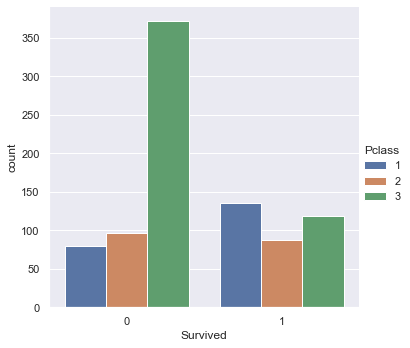

In [51]:
sbn.factorplot("Survived",kind="count",hue="Pclass",data=td)

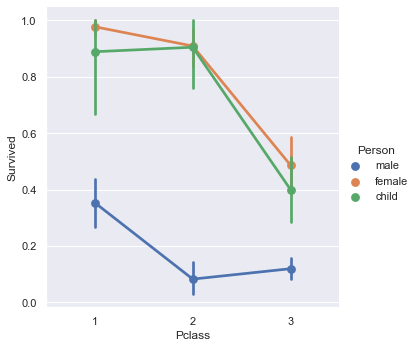

In [52]:
sbn.factorplot("Pclass","Survived",data=td,hue="Person")

# the above graph shows the survival ratio for male is very low regardless of the class and the survival race is less for the 3rd class 

C:\Users\harid\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


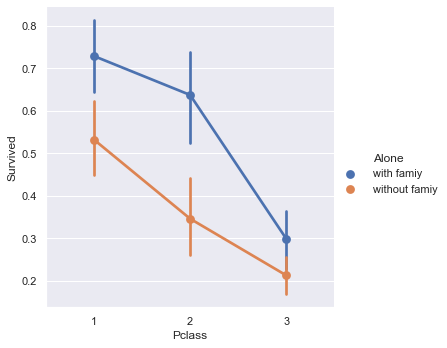

In [53]:
sbn.factorplot("Pclass","Survived",data=td,hue="Alone")

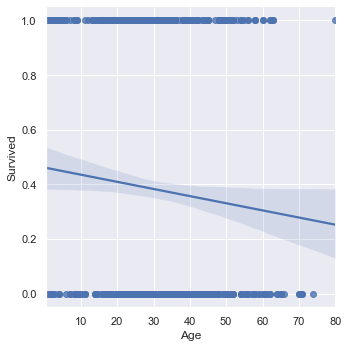

In [56]:
sbn.lmplot("Age","Survived",data=td)

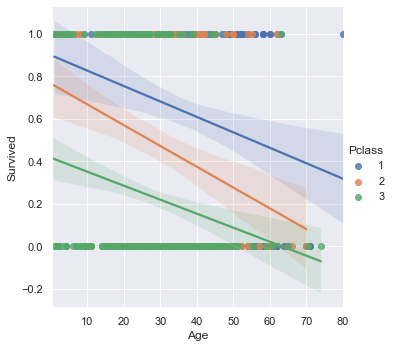

In [57]:
sbn.lmplot("Age","Survived",data=td,hue="Pclass")

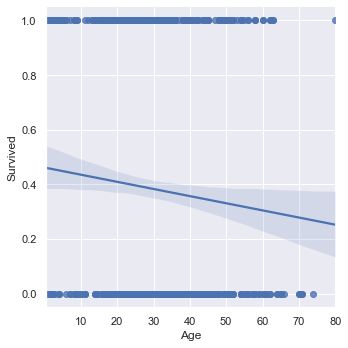

In [58]:
sbn.lmplot("Age","Survived",data=td)

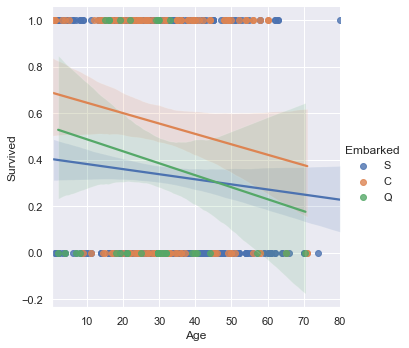

In [59]:
sbn.lmplot("Age","Survived",data=td,hue="Embarked")

Text(0.5, 1.0, ' correlation between features')

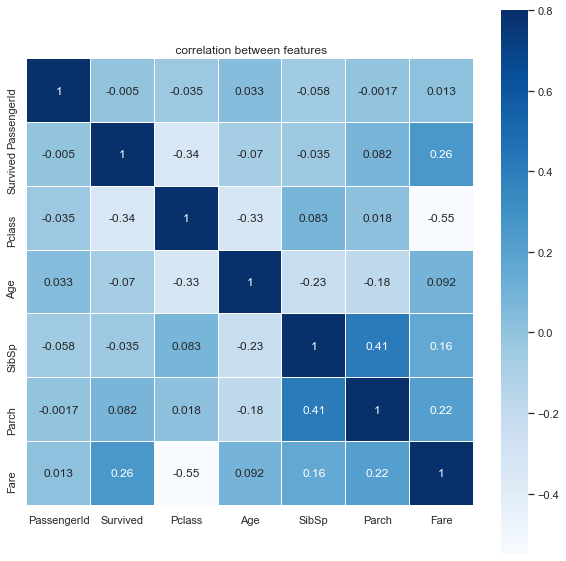

In [62]:
corr=td.corr()
plt.figure(figsize=(10,10))



sbn.heatmap(corr, vmax=.8, linewidths=0.01,square=True,annot=True,cmap="Blues",linecolor="white")


plt.title(" correlation between features")

In [63]:
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,male,with famiy
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,female,with famiy
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,female,without famiy
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,female,with famiy
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,male,without famiy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,male,without famiy
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,female,without famiy
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,female,with famiy
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,male,without famiy


In [64]:
person_dummies=pd.get_dummies(td["Person"])
alone_dummies=pd.get_dummies(td["Alone"])
Embarked_dummies=pd.get_dummies(td["Embarked"])
Embarked_dummies.drop("Q",axis=1,inplace=True)

In [65]:
Pclass_dummies=pd.get_dummies(td["Pclass"])
Pclass_dummies.columns=["class_1","class_2","class_3"]

In [66]:
import math

In [67]:
td["Age"]=td["Age"].apply(math.ceil)
td["Fare"]=td["Fare"].apply(math.ceil)

In [69]:
td=pd.concat([td,Pclass_dummies,person_dummies,alone_dummies,Embarked_dummies],axis=1)

In [80]:
td.drop(["PassengerId","Name","Sex","SibSp","Parch","Ticket","Embarked"],axis=1,inplace=True)
td.drop(["Alone","Person","Pclass","without family","male","class_3"],axis=1,inplace=True)

KeyError: "['PassengerId' 'Name' 'Sex' 'SibSp' 'Parch' 'Ticket' 'Embarked'] not found in axis"

In [73]:
td.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Person', 'Alone', 'class_1',
       'class_2', 'class_3', 'child', 'female', 'male', ' with famiy',
       ' without famiy', 'C', 'S'],
      dtype='object')

In [87]:
td.head(2)

,Survived,Pclass,Age,Fare,Alone,class_1,class_2,class_3,child,female,male,with famiy,without famiy,C,S
0,0,3,22,8,with famiy,0,0,1,0,0,1,1,0,0,1
1,1,1,38,72,with famiy,1,0,0,0,1,0,1,0,1,0


In [88]:
td.drop("Alone",axis=1,inplace=True)

In [89]:
td.head(2)

,Survived,Pclass,Age,Fare,class_1,class_2,class_3,child,female,male,with famiy,without famiy,C,S
0,0,3,22,8,0,0,1,0,0,1,1,0,0,1
1,1,1,38,72,1,0,0,0,1,0,1,0,1,0


In [93]:
x=td.drop("Survived",axis=1)
y=td.Survived

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [95]:
len(x_train)

712

In [96]:
len(x_test)

179

In [97]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
train_survival=log_model.predict(x_test)

C:\Users\harid\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
print(" accuracy score of logistic model is :",metrics.accuracy_score(y_true=y_test,y_pred=train_survival))

 accuracy score of logistic model is : 0.8100558659217877


In [11]:
from sklearn.tree import DecisionTreeClassifier